In [1]:
import numpy as np
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Эрмитова интерполяция
Отличие от интерполяционного многочлена Лагранжа в том, что на этот раз мы знаем не только значения функции в точках, но и значения её производных.
Это влечёт за собой рост степени: многочлен Лагранжа имеет степень **n-1**, многочлен Эрмита имеет степень **2n-1**.

In [2]:
n = 4
m = 10
x0, x1 = 0, 2*np.pi

func = np.sin
dfunc = np.cos

xs = np.linspace(x0, x1, n)
xs_dense = np.linspace(x0-1, x1+1, m*n + 1)

ys = func(xs)
dys = dfunc(xs)

ys_dense = func(xs_dense)

In [3]:
# Лагранж
lpoly = np.polyfit(xs, ys, n-1)

# Эрмит
hpoly = np.poly1d([0])
for k in range(n):
    #derive L_k
    L = np.poly1d([1])
    for i in range(n):
        if i != k:
            L = L * np.poly1d([1/(xs[k] - xs[i]), -xs[i]/(xs[k] - xs[i])])
    #differential of L_k
    dL = np.polyder(L)
    #derive H_k
    H = (np.poly1d([1]) - 2*dL(xs[k]) * np.poly1d([1, -xs[k]]))*L**2
    #derive G_k
    G = np.poly1d([1, -xs[k]])*L**2
    hpoly = hpoly + ys[k]*H + dys[k]*G

polys = {'lagrange': lpoly, 'hermite': hpoly}    

In [4]:
dpolys = {k: np.polyder(p) for k, p in polys.items()}

interp_ys = {k: np.polyval(p, xs) for k, p in polys.items()}
interp_dys = {k: np.polyval(dpolys[k], xs) for k, p in polys.items()}

interp_ys_dense = {k: np.polyval(p, xs_dense) for k, p in polys.items()}

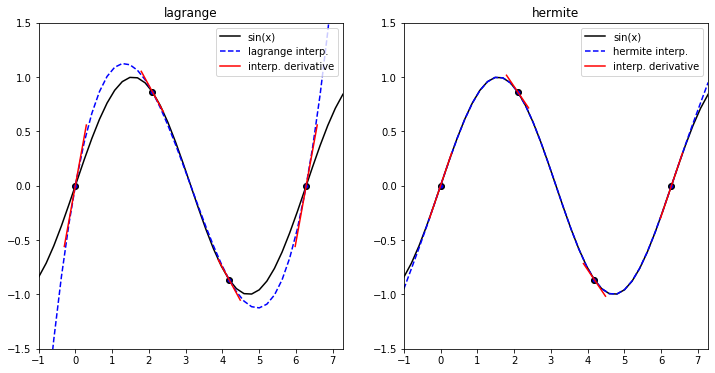

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, name in enumerate(polys.keys()):
    axs[i].plot(xs_dense, ys_dense, 'k-', label='sin(x)')
    axs[i].plot(xs, ys, 'ko')
    axs[i].plot(xs, interp_ys[name], 'b.')

    axs[i].plot(xs_dense, interp_ys_dense[name], 'b--', label=f'{name} interp.')

    for j in range(n):
        x = xs[j]
        y = interp_ys[name][j]
        dx = np.array([-1, 1]) * 0.3

        axs[i].plot(x + dx, y + dx * interp_dys[name][j], 'r-', label='interp. derivative' if j == 0 else None)

    axs[i].axis([xs_dense[0], xs_dense[-1], -1.5, 1.5])
    axs[i].set_title(name)
    axs[i].legend()
pass